# Tarea 6 - Jose Adrian Castillo Sierra - 1664207
# Luis Enrique López Nerio 1487280

Para la realizacion de esta tarea se realiza la clasificacion de vegetales utilizando 3 tecnicas diferentes con el fin de poder comparar las tecnicas y resultados obtenidos

## Arquitectura basada en AlexNet

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/MyDrive/Vegetable Images.zip" -d "/content"

Primero definimos algunos constantes como los tamaños de las imagenes, epochs y directorio base de las imagenes

In [10]:
Hg = 150
Lng = 150

INIT_LR = 0
BS = 16
EPOCHS = 20

BASE_DIR = '.\\Vegetable Images'

#para google colab
BASE_DIRG = "/content/gdrive/MyDrive/Vegetable Images"
TrainG = "/content/Vegetable Images/train"
ValG = "/content/Vegetable Images/validation"
TestG = "/content/Vegetable Images/test"



Utilizando ImageDataGenerator de keras cargamos los datos de entrenamiento y de validacion

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + '\\train', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')
train_datagen_flow = train_datagen.flow_from_directory(TrainG, target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [12]:
valid_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + '\\validation', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')
valid_datagen_flow = valid_datagen.flow_from_directory(ValG, target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 3000 images belonging to 15 classes.


Definimos una arquitectura de Red Neuronal con base a la de Alexnet

In [13]:
model = Sequential()
model.add(Conv2D(15, (11, 11), input_shape=(Lng, Hg, 3),
        padding='same', kernel_regularizer=l2(INIT_LR)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(15))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['acc', 'AUC'], optimizer='adam')
H = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=EPOCHS, verbose=1)

model.save('model.h5')

Epoch 1/20
938/938 [==============================] - 31s 32ms/step - loss: 1.4205 - acc: 0.5857 - auc: 0.9203 - val_loss: 1.1950 - val_acc: 0.6497 - val_auc: 0.9203
Epoch 2/20
938/938 [==============================] - 29s 31ms/step - loss: 0.8822 - acc: 0.7543 - auc: 0.9677 - val_loss: 0.9261 - val_acc: 0.7037 - val_auc: 0.9566
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 0.6818 - acc: 0.8092 - auc: 0.9745 - val_loss: 0.8431 - val_acc: 0.7480 - val_auc: 0.9536
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 0.5509 - acc: 0.8557 - auc: 0.9724 - val_loss: 1.9596 - val_acc: 0.5250 - val_auc: 0.8900
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 0.4506 - acc: 0.8871 - auc: 0.9705 - val_loss: 0.5135 - val_acc: 0.8457 - val_auc: 0.9481
Epoch 6/20
938/938 [==============================] - 30s 31ms/step - loss: 0.3654 - acc: 0.9113 - auc: 0.9683 - val_loss: 0.7486 - val_acc: 0.7827 - val_auc: 0.9161
Epoc

In [16]:

model.save('model.h5')

Mostramos las curvas de precision y de perdida a lo largo de los epochs.

Algo que se puede notar es como poco a poco el acurracy va en aumento al igual que la perdida se reduce.

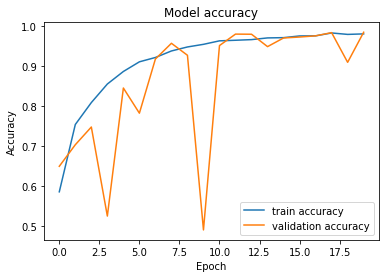

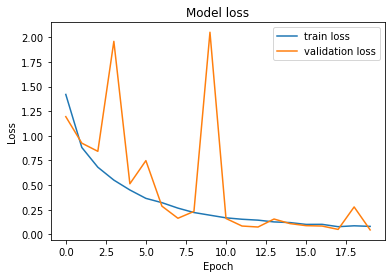

In [17]:
def plot_accuracy(history):
    
    plt.plot(history.history['acc'],label='train accuracy')
    plt.plot(history.history['val_acc'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(H)
plot_loss(H)

In [18]:
K.clear_session()
path_to_model='./model.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


En base al modelo generado vamos a compararlo con los datos de validacion. Para esto leeremos las imagenes de validacion y finalmente veremos el resultado final en una matriz de confusion.

In [19]:
validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    ValG,#BASE_DIR + '\\validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  if __name__ == '__main__':


Test Accuracy: 0.985


In [28]:
category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    #true=filedir.split('\\')[-1]
    true=filedir.split('/')[-1]
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(150, 150))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
                
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

In [29]:

validation_folder = ValG#BASE_DIR + '\\validation'
validation_folder

'/content/Vegetable Images/validation'

In [30]:
validation_folder = ValG#BASE_DIR + '\\validation'
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

Accuracy for Papaya: 0.98 (197/200)
Accuracy for Cauliflower: 0.99 (198/200)
Accuracy for Capsicum: 0.99 (199/200)
Accuracy for Carrot: 1.00 (200/200)
Accuracy for Tomato: 0.93 (186/200)
Accuracy for Cucumber: 1.00 (200/200)
Accuracy for Potato: 0.99 (199/200)
Accuracy for Pumpkin: 0.97 (195/200)
Accuracy for Cabbage: 0.98 (197/200)
Accuracy for Brinjal: 0.98 (197/200)
Accuracy for Broccoli: 0.98 (196/200)
Accuracy for Radish: 0.99 (199/200)
Accuracy for Bottle_Gourd: 0.99 (199/200)
Accuracy for Bean: 0.97 (195/200)
Accuracy for Bitter_Gourd: 0.99 (199/200)


In [38]:
def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        #true=true.split('\\')[-1]
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(150,150))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="CMRmap"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [32]:
y_true,y_pred=labels_confusion_matrix(validation_folder)

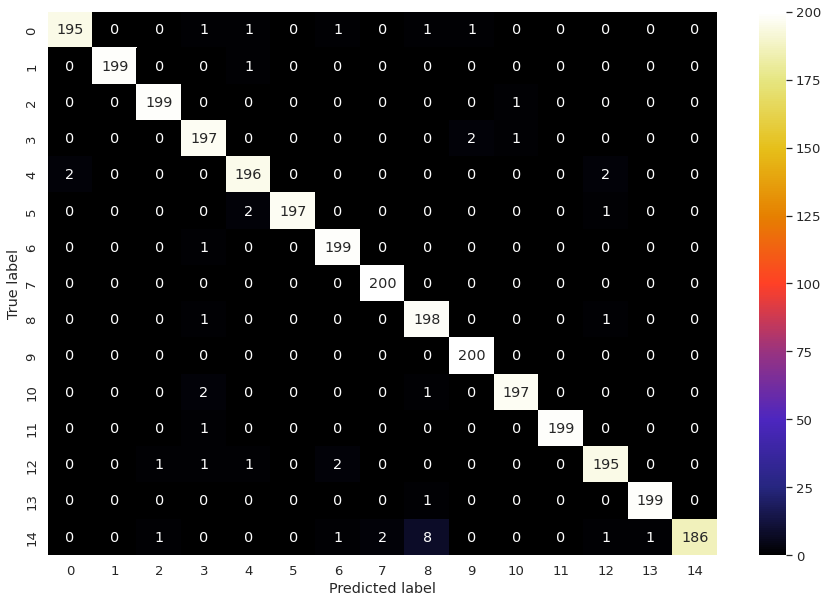

In [39]:
print_confusion_matrix(y_true,y_pred)

In [40]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

np.count_nonzero(y_pred == y_true) / len(y_pred)

0.9853333333333333

## Arquitectura especificada por nosotros con modificaciones en las imagenes de entrenamiento

Para la primera modificación se tomara una arquitectura propuesta de manera individual, se tomaran los mismos hiperparametros de batch size, learning rate, etc.
Se realizaran rotación aleatoria de entre 0 y 90 grados, movimiento horizontal y vertical de hasta el 20% del tamaño de la imagen y un zoom aleatorio.

In [41]:

entrenamiento_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=90,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,zoom_range=[0.5,1.0]) # Normalise the data
#entrenamiento_generator = entrenamiento_gen.flow_from_directory(BASE_DIR + '\\train',target_size=(Hg, Lng),batch_size=BS,class_mode='categorical',seed=42)
entrenamiento_generator = entrenamiento_gen.flow_from_directory(TrainG,target_size=(Hg, Lng),batch_size=BS,class_mode='categorical',seed=42)

# 2. Validation Set
valid_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + '\\validation', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')
valid_datagen_flow = valid_datagen.flow_from_directory(ValG, target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Se construye la read Neuronal con una arquitectura propuesta diferente a la de Alexnet.

In [42]:
#Construir Red
model = Sequential() # model object
# Add Layers
model.add(Conv2D(filters=64, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=[Hg, Lng, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 128)               2

Se entrena el modelo con un optimizador Adam, se utiliza la función de perdida  CrossEntropy Categorica.

In [43]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc', 'AUC'])
H2 = model.fit(entrenamiento_generator, 
                 #epochs=2,
                 epochs=EPOCHS, 
                 verbose=1, 
                 validation_data=valid_datagen_flow, 
                 steps_per_epoch=len(entrenamiento_generator), 
                 validation_steps = len(valid_datagen_flow), 
                 callbacks=early_stopping)

Epoch 1/20
938/938 [==============================] - 91s 96ms/step - loss: 2.4578 - acc: 0.1921 - auc: 0.7338 - val_loss: 2.8618 - val_acc: 0.1847 - val_auc: 0.7325
Epoch 2/20
938/938 [==============================] - 89s 94ms/step - loss: 2.1259 - acc: 0.2785 - auc: 0.8116 - val_loss: 1.8713 - val_acc: 0.3253 - val_auc: 0.8630
Epoch 3/20
938/938 [==============================] - 89s 95ms/step - loss: 1.8780 - acc: 0.3645 - auc: 0.8589 - val_loss: 1.6767 - val_acc: 0.4210 - val_auc: 0.8922
Epoch 4/20
938/938 [==============================] - 89s 95ms/step - loss: 1.8660 - acc: 0.3630 - auc: 0.8611 - val_loss: 1.7101 - val_acc: 0.4260 - val_auc: 0.9101
Epoch 5/20
938/938 [==============================] - 89s 95ms/step - loss: 1.7082 - acc: 0.4145 - auc: 0.8862 - val_loss: 1.5032 - val_acc: 0.4813 - val_auc: 0.9165
Epoch 6/20
938/938 [==============================] - 89s 95ms/step - loss: 1.5394 - acc: 0.4741 - auc: 0.9097 - val_loss: 1.2423 - val_acc: 0.5797 - val_auc: 0.9462
Epoc

In [45]:
model.save('model2.h5')
K.clear_session()
path_to_model='./model2.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


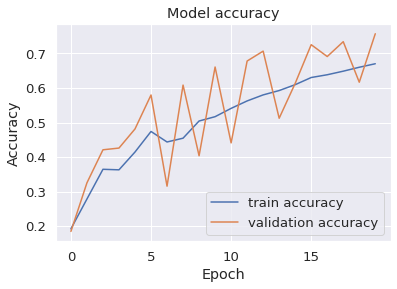

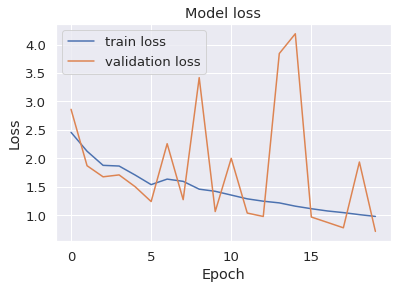

In [46]:
plot_accuracy(H2)
plot_loss(H2)

In [47]:
validation_datagen = image.ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(
    ValG,#BASE_DIR + '\\validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test Accuracy: 0.757


#### Test

In [48]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=10,width_shift_range=0.2) # Normalise the data
#test_image_generator = test_gen.flow_from_directory(BASE_DIR+"\\test",target_size=(Hg, Lng),batch_size=1,class_mode='categorical',shuffle=False)
test_image_generator = test_gen.flow_from_directory(TrainG,target_size=(Hg, Lng),batch_size=1,class_mode='categorical',shuffle=False)

Found 15000 images belonging to 15 classes.


In [49]:
filenames = test_image_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_image_generator,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)
true_classes = test_image_generator.classes
class_labels = list(test_image_generator.class_indices.keys()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Se observa que no se cuenta con un desempeño muy bueno comparado con el de la red usando la estructura de alexnet.

In [50]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


              precision    recall  f1-score   support

        Bean       0.53      0.86      0.65      1000
Bitter_Gourd       0.66      0.78      0.72      1000
Bottle_Gourd       0.96      0.55      0.70      1000
     Brinjal       0.69      0.57      0.62      1000
    Broccoli       0.71      0.80      0.76      1000
     Cabbage       0.82      0.53      0.64      1000
    Capsicum       0.91      0.96      0.93      1000
      Carrot       0.97      0.98      0.98      1000
 Cauliflower       0.71      0.85      0.77      1000
    Cucumber       0.56      0.68      0.61      1000
      Papaya       0.81      0.63      0.71      1000
      Potato       0.94      0.95      0.94      1000
     Pumpkin       0.84      0.83      0.84      1000
      Radish       0.90      0.76      0.82      1000
      Tomato       0.88      0.82      0.85      1000

    accuracy                           0.77     15000
   macro avg       0.79      0.77      0.77     15000
weighted avg       0.79   

In [53]:
def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="CMRmap"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap, xticklabels = class_labels, 
            yticklabels = class_labels) # font size
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

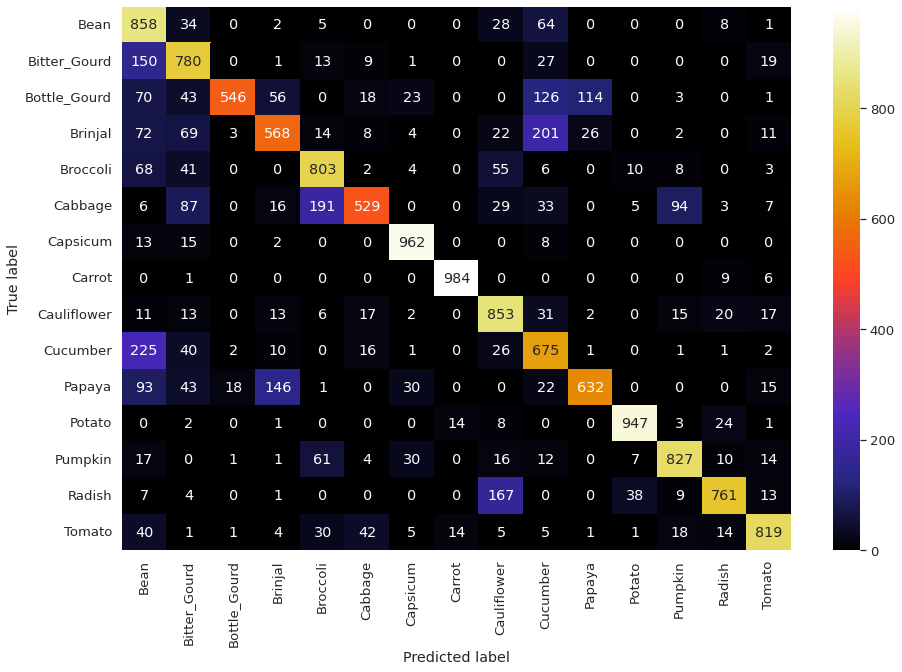

In [54]:
print_confusion_matrix(true_classes,predicted_classes)